In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
Data=pd.read_csv('diabetes.csv')

In [3]:
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Data.shape

(768, 9)

In [5]:
Data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
Data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
Data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
X=Data.iloc[:,:8]

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y=Data.iloc[:,-1]

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
scaler=StandardScaler()

In [15]:
Standarize_data=scaler.fit_transform(X)

In [16]:
print(Standarize_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X=Standarize_data

In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=51)

In [20]:
X_train

array([[-0.25095213, -0.68523633,  0.56322275, ..., -1.61093244,
        -0.56740873, -0.27575966],
       [ 0.3429808 , -1.37377352,  0.66661825, ...,  0.48323511,
        -0.95398392,  0.14967911],
       [-1.14185152,  0.44146091, -0.05715025, ...,  1.30821021,
        -0.32277912, -0.78628618],
       ...,
       [ 1.23388019, -0.09059057,  0.14964075, ..., -1.1286393 ,
         3.03257273,  1.08564439],
       [-0.84488505, -0.46615631,  0.04624525, ...,  0.28016432,
        -0.99626558, -0.95646168],
       [-0.84488505,  0.22238089, -1.09110524, ...,  1.07975556,
         0.42621032, -0.78628618]])

In [21]:
import seaborn as sns

<Axes: xlabel='Glucose', ylabel='BMI'>

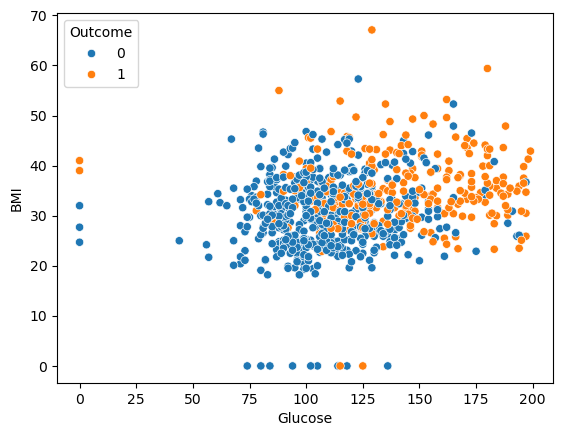

In [22]:
sns.scatterplot(x=Data['Glucose'],y=Data['BMI'],hue=y)

In [23]:
classifier=svm.SVC(kernel='rbf')

In [24]:
classifier.fit(X_train,y_train)

SVC()

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
X_train_pred=classifier.predict(X_train)

In [27]:
training_data_acc=accuracy_score(y_train,X_train_pred)

In [28]:
training_data_acc

0.8208469055374593

In [29]:
test_data_acc=accuracy_score(y_test,y_pred)

In [30]:
print("accuracy score of test data :",test_data_acc)

accuracy score of test data : 0.7922077922077922


In [31]:
import pickle

In [32]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
    

In [33]:
with open('classifier.pkl','wb')as f:
    pickle.dump(classifier,f)